## Attach the notebook to the cluster and run all commands in the notebook

1. Return to this notebook. 
1. In the notebook menu bar, select **<img src="http://docs.databricks.com/_static/images/notebooks/detached.png"/></a> > Quickstart**.
1. When the cluster changes from <img src="http://docs.databricks.com/_static/images/clusters/cluster-starting.png"/></a> to <img src="http://docs.databricks.com/_static/images/clusters/cluster-running.png"/></a>, click **<img src="http://docs.databricks.com/_static/images/notebooks/run-all.png"/></a> Run All**.

In [0]:
%sql
DROP TABLE IF EXISTS diabetes;

CREATE TABLE diabetes
USING csv
OPTIONS (path "/FileStore/tables/diabetic_data.csv", header "true")

In [0]:
# %sql
# SELECT * FROM diabetes EXCEPT (select * from diabetes where time_in_hospital rlike '^(([0-9]*)|(([0-9]*)\.([0-9]*)))$')

In [0]:
%sql
DESCRIBE TABLE diabetes;

col_name,data_type,comment
encounter_id,string,null
patient_nbr,string,null
race,string,null
gender,string,null
age,string,null
weight,string,null
admission_type_id,string,null
discharge_disposition_id,string,null
admission_source_id,string,null
time_in_hospital,string,null


In [0]:
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import when

dataset = spark.read.csv("/FileStore/tables/diabetic_data.csv", header="true")
colsToConvert = ["time_in_hospital", "num_procedures", "num_lab_procedures", "num_medications", "number_outpatient", "number_inpatient", "number_emergency", "number_diagnoses", "A1Cresult", "max_glu_serum"]
for col in colsToConvert:
  dataset = dataset.withColumn(col, dataset[col].cast(IntegerType()))
dataset = dataset.withColumn("readmitted", when(dataset["readmitted"] == "NO", 0).otherwise(1))
dataset = dataset.withColumn("A1Cresult", when(dataset["A1Cresult"] == ">8", 3).when(dataset["A1Cresult"] == ">7", 2).when(dataset["A1Cresult"] == "Norm", 1).otherwise(0))
dataset = dataset.withColumn("max_glu_serum", when(dataset["max_glu_serum"] == ">300", 3).when(dataset["max_glu_serum"] == ">200", 2).when(dataset["max_glu_serum"] == "Norm", 1).otherwise(0))

display(dataset)

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,0,0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,0,0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,1
55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,0,0,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,0,0,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1
12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,0,0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,0,0,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0


In [0]:
trainDF, testDF = dataset.randomSplit([0.8, 0.2], seed=42)
print(trainDF.cache().count())
print(testDF.count())

81565
20201

In [0]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
 
categoricalCols = ["race", "gender", "discharge_disposition_id", "admission_source_id", "diabetesMed", "metformin", 'repaglinide', "diag_1", "diag_2", "diag_3", 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'admission_type_id']
 # no examide or citoglipton bc IllegalArgumentException: requirement failed: The input column examideIndex should have at least two distinct values.

# The following two lines are estimators. They return functions that we will later apply to transform the dataset.
stringIndexer = StringIndexer(inputCols=categoricalCols, outputCols=[x + "Index" for x in categoricalCols]) 
stringIndexer.setHandleInvalid("keep")
encoder = OneHotEncoder(inputCols=stringIndexer.getOutputCols(), outputCols=[x + "OHE" for x in categoricalCols]) 
 
# The label column ("income") is also a string value - it has two possible values, "<=50K" and ">50K". 
# Convert it to a numeric value using StringIndexer.
#labelToIndex = StringIndexer(inputCol="income", outputCol="label")
ageIndexer = StringIndexer(inputCol="age", outputCol="ageIndex") 

# stringIndexerModel = stringIndexer.fit(dataset)
# display(stringIndexerModel.transform(dataset))
labelToIndex = StringIndexer(inputCol="readmitted", outputCol="label")


In [0]:
from pyspark.ml.feature import VectorAssembler
 
# This includes both the numeric columns and the one-hot encoded binary vector columns in our dataset.
numericCols = ["time_in_hospital", "num_procedures", "num_lab_procedures", "num_medications", "number_outpatient", "number_inpatient", "number_emergency", "number_diagnoses", "A1Cresult", "max_glu_serum"]


assemblerInputs = [c + "OHE" for c in categoricalCols] + numericCols + ["ageIndex"]

vecAssembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

In [0]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol="features", labelCol="label", regParam=0.3, maxIter=10)


# https://spark.apache.org/docs/latest/ml-classification-regression.html#logistic-regression

In [0]:
from pyspark.ml import Pipeline
 
# Define the pipeline based on the stages created in previous steps.
pipeline = Pipeline(stages=[stringIndexer, encoder, ageIndexer, labelToIndex, vecAssembler, lr])
 
# Define the pipeline model.
pipelineModel = pipeline.fit(trainDF)

lrModel = pipelineModel.stages[-1]
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)

trainingSummary.residuals.show()
# Apply the pipeline model to the test dataset.
predDF = pipelineModel.transform(testDF)

# https://stackoverflow.com/questions/44773758/how-to-conditionally-replace-value-in-a-column-based-on-evaluation-of-expression

Coefficients: [0.01175555058207251,-0.0005152442661883926,-0.050564186982043124,-0.018116240288410617,-0.023651010168431005,-0.05441587064751644,0.0066806004138820685,-0.006677129154378089,-0.07088682134663817,0.0015482167489370318,0.010815180567088288,0.03366334676357578,-0.014975031249281814,0.0020786880859017627,0.045323149616892607,-0.28778455093669447,0.03674067486542027,-0.009235214581635209,0.0074795006509773485,0.006231142040162319,-0.21566854289898857,-0.04231399437362835,-0.24460897993433722,0.09704239822165191,0.023067992695510353,0.18937690050451905,-1.3415600669379399e-06,-0.011623687013622177,-0.07183123878967407,-0.24233859784275455,0.00430340244079472,-0.12787020272446223,0.3280189589302359,0.04752805384156438,-0.2784410166288319,0.024152964460137285,-0.0015244687957277532,-0.011532468516237697,-0.07870476696286187,-0.08984417248496851,-0.034978263879930284,-0.04564083219151015,0.06051466407564062,0.11204003166608367,-0.08080267704871628,-0.00300991208365706,0.014284890388232,-0.08031201542525285,-0.29754731860171174,-0.2814397340359935,-0.2243149215635232,-0.2719361617424916,0.02112300323419373,-0.02112300323419618,0.009979016640746088,-0.008803593478104254,-0.02479722872762695,-0.0032525232203546913,-0.016058644856650824,0.019768077241186396,-0.03112842138526836,0.02218716404709535,0.05464194833495528,-0.01052040189347876,-0.007690265473402558,-0.022811843184974864,-0.0057770550647734745,-0.010180688406804627,0.05919846859222768,-0.02771383682011431,-0.003229412426296486,0.0005424167097651759,-0.006432876905368617,0.015171006779908444,0.01450333889101205,-0.0130364303164015,0.024987423291614973,-0.001450993741578986,-0.019400404714561923,0.012596290818996466,0.059044661256540704,-0.03239726546735876,-0.03331235467531847,0.06330687578060461,0.037921149177830196,-0.005019043331386233,-0.03710502477362398,0.020207143279975723,0.004733504791842464,0.01431709093761392,0.015666986421251018,0.037882523801888196,0.029162548659902934,0.01607051901299938,-0.029221493351167412,-0.04678853201291376,0.025154641526896677,-0.020697897853685025,0.04213523116481329,-0.04066935573638639,-0.0038461383611013544,-0.02901396974632978,0.03240267063500645,0.014522080673434318,0.06933884872106906,-0.0055050473505165575,0.06186520624609268,0.002330114659457154,-0.05119444774925568,-0.033076273689327564,-0.05538116824113589,-0.01565963320192351,-0.023932159201663698,-0.004781773264010877,0.020779752640498934,-0.11282820262237682,0.05012454016205184,0.030479627064921636,0.013972767179391405,-0.034000298829156284,-0.04454739234831797,0.03655538447633059,0.05394605176202743,0.00466858529061819,-0.005547898459748419,-0.02685146352528591,-0.04814079576657841,-0.006290671177534374,-0.02104418604660801,-0.007969577108274431,-0.053328201142117955,0.01443354931507355,-0.017438446983840936,0.052318132516567084,0.00823779774627639,0.047977452313120665,0.03610650047589175,0.017507497625964423,0.028580310587753618,0.0167963643577128,-0.012961829269255544,0.014921260707646905,0.05209333116171957,-0.10372316015294304,-0.06813048225559648,-0.05353699597452556,0.13521945476384772,0.01486110843361115,-0.04730260904113762,-0.026953665963273272,-0.002056949928214942,0.005626842637549553,-0.031859579159830606,-0.10941387470778169,-0.029730197295267435,-0.009648216347628451,-0.02525582934420294,-0.06431807088946127,-0.004570555445713027,-0.07030965675458369,-0.06096170053082059,0.018201338654831242,-0.011911065319448128,-0.07980314516282941,-0.03772519010032847,0.0004944342648118279,0.011535697203162444,-0.01724773330853169,-0.01623006615580994,-0.04694774597687144,-0.0367565112607349,-0.008655157852953321,-0.000877877773563318,-0.05541462603166311,-0.10635372121468561,-0.034472876366867716,-0.04185058004349659,-0.02499275476413086,-0.016657949640244002,0.002737759609123477,-0.008176036877811205,0.017690312211156124,0.045849881404750104,-0.11771869123267127,-0.10072602064243752,-0.04212952153907859,0.031053779448234592,0.10528396576935979,-0.021280632606729

In [0]:
#display(predDF.select("features", "label", "prediction"))
#display(pipelineModel.stages[-1], predDF.drop("prediction", "rawPrediction", "probability"), "ROC")
# probability is only for logistic regression 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
mcEvaluator = MulticlassClassificationEvaluator(metricName="accuracy")

mcEvaluator.evaluate(predDF)

Out[224]: 0.0

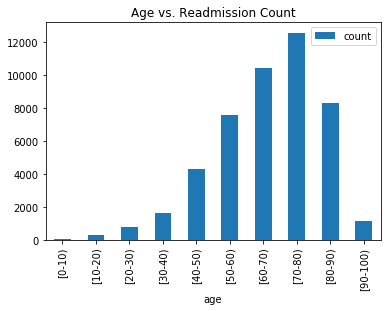

In [0]:
#test_result = lrModel.evaluate(predDF)
#print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)
#predDF.select("prediction","features").show(5)
#display(predDF)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# https://docs.databricks.com/notebooks/visualizations/matplotlib.html
df_age = dataset[dataset.readmitted != 0].select("age", "readmitted").groupby('age').count().orderBy("age")
#display(df_age.toPandas())
# result = df.sort(['A', 'B'], ascending=[1, 0])
#df_age = dataset[dataset.readmitted != 0].groupby('age').count()
df_age.toPandas().plot(x="age", y="count", kind="bar")
plt.title('Age vs. Readmission Count')
plt.show()

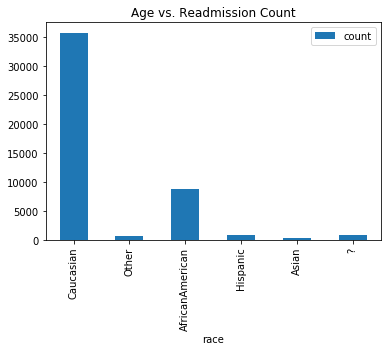

In [0]:
df_race = dataset[dataset.readmitted != 0].select("race", "readmitted").groupby('race').count()
df_race.toPandas().plot(x="race", y="count", kind="bar")
plt.title('Age vs. Readmission Count')
plt.show()

In [0]:
import pyspark.sql.functions as functions
predDF = predDF.withColumn("accurate", functions.when((predDF["label"] == 1) &( predDF["prediction"] >= 0.5 ), 1).when((predDF["label"] == 0) & (predDF["prediction"] < 0.5) , 1).otherwise(0))
display(predDF.select("prediction", "label", "accurate"))
predDF = predDF.withColumn("accurate", predDF["accurate"].cast(IntegerType()))
display(predDF.groupBy('accurate').count())

prediction,label,accurate
0.5245787384678087,1.0,1
0.4036495578034703,0.0,1
0.4221794548320073,0.0,1
0.440093870174005,1.0,0
0.14847369360300183,0.0,1
0.44402904327275233,0.0,1
0.4541308994387101,1.0,0
0.5415704353093801,1.0,1
0.5734394788137035,1.0,1
0.4142779305919548,0.0,1


accurate,count
1,12703
0,7498


In [0]:
import pyspark.sql.functions as functions
predDF = predDF.withColumn("accurate", functions.when((predDF["label"] == 1) &( predDF["prediction"] >= 0.5 ), 1).when((predDF["label"] == 0) & (predDF["prediction"] < 0.5) , 1).otherwise(0))

display(predDF.select("features", "prediction", "readmitted", "accurate"))

predDF = predDF.withColumn("accurate", predDF["accurate"].cast(IntegerType()))

# # >>> df.select(when(df.age == 2, df.age + 1).alias("age")).collect()
# #[Row(age=3), Row(age=None)]
display(predDF.select(functions.sum("accurate"), functions.count("accurate")))
#display(predDF.groupBy('accurate').agg(functions.sum('accurate')))

features,prediction,readmitted,accurate
"Map(vectorType -> sparse, length -> 2320, indices -> List(1, 6, 9, 35, 52, 54, 58, 63, 762, 1484, 2239, 2243, 2247, 2251, 2253, 2257, 2261, 2263, 2267, 2271, 2275, 2279, 2281, 2286, 2287, 2291, 2293, 2295, 2297, 2300, 2301, 2309, 2310, 2311, 2312, 2314, 2316, 2319), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 4.0, 57.0, 21.0, 1.0, 9.0, 2.0))",0.5245787384678087,1,1
"Map(vectorType -> sparse, length -> 2320, indices -> List(2, 6, 9, 38, 52, 54, 58, 186, 813, 1592, 2239, 2243, 2247, 2251, 2253, 2257, 2261, 2263, 2267, 2271, 2275, 2279, 2281, 2285, 2287, 2291, 2293, 2295, 2297, 2300, 2303, 2309, 2310, 2311, 2312, 2316, 2319), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 8.0, 1.0, 71.0, 18.0, 9.0, 4.0))",0.4036495578034703,0,1
"Map(vectorType -> sparse, length -> 2320, indices -> List(1, 6, 9, 35, 52, 54, 58, 90, 860, 1550, 2239, 2243, 2247, 2251, 2254, 2257, 2261, 2263, 2267, 2271, 2275, 2279, 2281, 2283, 2287, 2291, 2293, 2295, 2297, 2299, 2301, 2309, 2311, 2312, 2316, 2319), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 68.0, 8.0, 3.0, 4.0))",0.4221794548320073,0,1
"Map(vectorType -> sparse, length -> 2320, indices -> List(0, 7, 9, 40, 52, 54, 58, 146, 888, 1482, 2239, 2243, 2247, 2251, 2254, 2257, 2261, 2263, 2267, 2271, 2275, 2279, 2281, 2284, 2287, 2291, 2293, 2295, 2297, 2300, 2302, 2309, 2310, 2311, 2312, 2316, 2319), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 2.0, 43.0, 16.0, 4.0, 1.0))",0.440093870174005,1,0
"Map(vectorType -> sparse, length -> 2320, indices -> List(0, 6, 9, 36, 53, 54, 58, 214, 802, 1503, 2239, 2243, 2247, 2251, 2253, 2257, 2261, 2263, 2267, 2271, 2275, 2279, 2281, 2283, 2287, 2291, 2293, 2295, 2297, 2299, 2302, 2309, 2310, 2311, 2312, 2316, 2319), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 22.0, 13.0, 5.0, 5.0))",0.14847369360300183,0,1
"Map(vectorType -> sparse, length -> 2320, indices -> List(0, 7, 9, 36, 52, 55, 58, 97, 853, 1753, 2239, 2243, 2247, 2251, 2253, 2257, 2261, 2263, 2267, 2271, 2275, 2279, 2281, 2283, 2287, 2291, 2293, 2295, 2297, 2299, 2303, 2309, 2311, 2312, 2314, 2316, 2319), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 54.0, 3.0, 2.0, 4.0, 2.0))",0.44402904327275233,0,1
"Map(vectorType -> sparse, length -> 2320, indices -> List(1, 6, 9, 35, 52, 54, 58, 158, 757, 1526, 2239, 2243, 2247, 2251, 2253, 2257, 2261, 2263, 2267, 2271, 2275, 2279, 2281, 2286, 2287, 2291, 2293, 2295, 2297, 2300, 2301, 2309, 2310, 2311, 2312, 2316, 2319), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 57.0, 23.0, 9.0, 3.0))",0.4541308994387101,1,0
"Map(vectorType -> sparse, length -> 2320, indices -> List(1, 6, 9, 35, 52, 54, 58, 62, 766, 1488, 2239, 2243, 2247, 2251, 2253, 2257, 2261, 2263, 2267, 2271, 2275, 2279, 2281, 2284, 2287, 2291, 2293, 2295, 2297, 2299, 2301, 2309, 2311, 2312, 2316), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 7.0, 57.0, 13.0, 9.0))",0.5415704353093801,1,1
"Map(vectorType -> sparse, length -> 2320, indices -> List(1, 7, 9,

sum(accurate),count(accurate)
12703,20201


In [0]:
mode_val = []
for i in [ 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']:
  #cnts = dataset.groupBy(i).count()
  mode = dataset.groupBy(i).count().orderBy("count", ascending=False)
  #mode2 = mode.withColumn(i,col(i).cast("double"))
  print((i, mode.first()[0], mode.first()[1]))

('race', 'Caucasian', 76099)
('gender', 'Female', 54708)
('age', '[70-80)', 26068)
('weight', '?', 98569)
('admission_type_id', '1', 53990)
('discharge_disposition_id', '1', 60234)
('admission_source_id', '7', 57494)
('time_in_hospital', 3, 17756)
('payer_code', '?', 40256)
('medical_specialty', '?', 49949)
('num_lab_procedures', 1, 3208)
('num_procedures', 0, 46652)
('num_medications', 13, 6086)
('number_outpatient', 0, 85027)
('number_emergency', 0, 90383)
('number_inpatient', 0, 67630)
('diag_1', '428', 6862)
('diag_2', '276', 6752)
('diag_3', '250', 11555)
('number_diagnoses', 9, 49474)
('max_glu_serum', 0, 101766)
('A1Cresult', 0, 101766)
('metformin', 'No', 81778)
('repaglinide', 'No', 100227)
('nateglinide', 'No', 101063)
('chlorpropamide', 'No', 101680)
('glimepiride', 'No', 96575)
('acetohexamide', 'No', 101765)
('glipizide', 'No', 89080)
('glyburide', 'No', 91116)
('tolbutamide', 'No', 101743)
('pioglitazone', 'No', 94438)
('rosiglitazone', 'No', 95401)
('acarbose', 'No', 101458)
('miglitol', 'No', 101728)
('troglitazone', 'No', 101763)
('tolazamide', 'No', 101727)
('examide', 'No', 101766)
('citoglipton', 'No', 101766)
('insulin', 'No', 47383)
('glyburide-metformin', 'No', 101060)
('glipizide-metformin', 'No', 101753)
('glimepiride-pioglitazone', 'No', 101765)
('metformin-rosiglitazone', 'No', 101764)
('metformin-pioglitazone', 'No', 101765)
('change', 'No', 54755)
('diabetesMed', 'Yes', 78363)

In [0]:

# for i in numericCols:
#   avg = dataset.select(functions.mean(dataset[i]))
#   #mode2 = mode.withColumn(i,col(i).cast("double"))
#   print((i, avg.first()[0]))
stringIndexerModel = ageIndexer.fit(dataset)
df2 = stringIndexerModel.transform(dataset)
print(df2.select(functions.mean(df2["ageIndex"])).first()[0])
#print(trainDF.select(functions.mean(trainDF["ageIndex"])))

1.980376550124796

In [0]:
display(predDF.select("features", "prediction", "label", "accurate"))


features,prediction,label,accurate
"Map(vectorType -> sparse, length -> 2320, indices -> List(1, 6, 9, 35, 52, 54, 58, 63, 762, 1484, 2239, 2243, 2247, 2251, 2253, 2257, 2261, 2263, 2267, 2271, 2275, 2279, 2281, 2286, 2287, 2291, 2293, 2295, 2297, 2300, 2301, 2309, 2310, 2311, 2312, 2314, 2316, 2319), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 4.0, 57.0, 21.0, 1.0, 9.0, 2.0))",0.5245787384678087,1.0,1
"Map(vectorType -> sparse, length -> 2320, indices -> List(2, 6, 9, 38, 52, 54, 58, 186, 813, 1592, 2239, 2243, 2247, 2251, 2253, 2257, 2261, 2263, 2267, 2271, 2275, 2279, 2281, 2285, 2287, 2291, 2293, 2295, 2297, 2300, 2303, 2309, 2310, 2311, 2312, 2316, 2319), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 8.0, 1.0, 71.0, 18.0, 9.0, 4.0))",0.4036495578034703,0.0,1
"Map(vectorType -> sparse, length -> 2320, indices -> List(1, 6, 9, 35, 52, 54, 58, 90, 860, 1550, 2239, 2243, 2247, 2251, 2254, 2257, 2261, 2263, 2267, 2271, 2275, 2279, 2281, 2283, 2287, 2291, 2293, 2295, 2297, 2299, 2301, 2309, 2311, 2312, 2316, 2319), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 68.0, 8.0, 3.0, 4.0))",0.4221794548320073,0.0,1
"Map(vectorType -> sparse, length -> 2320, indices -> List(0, 7, 9, 40, 52, 54, 58, 146, 888, 1482, 2239, 2243, 2247, 2251, 2254, 2257, 2261, 2263, 2267, 2271, 2275, 2279, 2281, 2284, 2287, 2291, 2293, 2295, 2297, 2300, 2302, 2309, 2310, 2311, 2312, 2316, 2319), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 2.0, 43.0, 16.0, 4.0, 1.0))",0.440093870174005,1.0,0
"Map(vectorType -> sparse, length -> 2320, indices -> List(0, 6, 9, 36, 53, 54, 58, 214, 802, 1503, 2239, 2243, 2247, 2251, 2253, 2257, 2261, 2263, 2267, 2271, 2275, 2279, 2281, 2283, 2287, 2291, 2293, 2295, 2297, 2299, 2302, 2309, 2310, 2311, 2312, 2316, 2319), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 22.0, 13.0, 5.0, 5.0))",0.14847369360300183,0.0,1
"Map(vectorType -> sparse, length -> 2320, indices -> List(0, 7, 9, 36, 52, 55, 58, 97, 853, 1753, 2239, 2243, 2247, 2251, 2253, 2257, 2261, 2263, 2267, 2271, 2275, 2279, 2281, 2283, 2287, 2291, 2293, 2295, 2297, 2299, 2303, 2309, 2311, 2312, 2314, 2316, 2319), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 54.0, 3.0, 2.0, 4.0, 2.0))",0.44402904327275233,0.0,1
"Map(vectorType -> sparse, length -> 2320, indices -> List(1, 6, 9, 35, 52, 54, 58, 158, 757, 1526, 2239, 2243, 2247, 2251, 2253, 2257, 2261, 2263, 2267, 2271, 2275, 2279, 2281, 2286, 2287, 2291, 2293, 2295, 2297, 2300, 2301, 2309, 2310, 2311, 2312, 2316, 2319), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 57.0, 23.0, 9.0, 3.0))",0.4541308994387101,1.0,0
"Map(vectorType -> sparse, length -> 2320, indices -> List(1, 6, 9, 35, 52, 54, 58, 62, 766, 1488, 2239, 2243, 2247, 2251, 2253, 2257, 2261, 2263, 2267, 2271, 2275, 2279, 2281, 2284, 2287, 2291, 2293, 2295, 2297, 2299, 2301, 2309, 2311, 2312, 2316), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 7.0, 57.0, 13.0, 9.0))",0.5415704353093801,1.0,1
"Map(vectorType -> sparse, length -> 2320, indices -> Li

In [0]:
testDF.columns

Out[232]: ['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [0]:
dbutils.fs.help()

dbutils.fs provides utilities for working with FileSystems. Most methods in
this package can take either a DBFS path (e.g., "/foo" or "dbfs:/foo"), or
another FileSystem URI.

For more info about a method, use dbutils.fs.help("methodName") .

In notebooks, you can also use the %fs shorthand to access DBFS. The %fs shorthand maps
straightforwardly onto dbutils calls. For example, "%fs head --maxBytes=10000 /file/path"
translates into "dbutils.fs.head("/file/path", maxBytes = 10000)".
 fsutils cp(from: String, to: String, recurse: boolean = false): boolean -> Copies a file or directory, possibly across FileSystems head(file: String, maxBytes: int = 65536): String -> Returns up to the first 'maxBytes' bytes of the given file as a String encoded in UTF-8 ls(dir: String): Seq -> Lists the contents of a directory mkdirs(dir: String): boolean -> Creates the given directory if it does not exist, also creating any necessary parent directories mv(from: String, to: String, recurse: boolean = false): boolean -> Moves a file or directory, possibly across FileSystems put(file: String, contents: String, overwrite: boolean = false): boolean -> Writes the given String out to a file, encoded in UTF-8 rm(dir: String, recurse: boolean = false): boolean -> Removes a file or directory mount mount(source: String, mountPoint: String, encryptionType: String = "", owner: String = null, extraConfigs: Map = Map.empty[String, String]): boolean -> Mounts the given source directory into DBFS at the given mount point mounts: Seq -> Displays information about what is mounted within DBFS refreshMounts: boolean -> Forces all machines in this cluster to refresh their mount cache, ensuring they receive the most recent information unmount(mountPoint: String): boolean -> Deletes a DBFS mount point

In [0]:
import zipfile

dbutils.fs.rm("dbfs:/lr_model.pkl", True)
lrModel.save('/lr_model.pkl')
dbutils.fs.rm("file:/databricks/driver/lr_model.pkl", True)
dbutils.fs.cp("dbfs:/lr_model.pkl", "file:/databricks/driver/lr_model.pkl", True)

with zipfile.ZipFile('pickle.zip', 'w') as myzip:
    myzip.write('lr_model.pkl')

dbutils.fs.cp("file:/databricks/driver/pickle.zip", "dbfs:/FileStore/")


Out[348]: True

In [0]:
display(dbutils.fs.ls("dbfs:/File"))

path,name,size
dbfs:/lr_model.pkl/data/,data/,0
dbfs:/lr_model.pkl/metadata/,metadata/,0


In [0]:
import pickle
filename ='lr_model_pickle_dump.pkl'
with open('../'+filename,'wb')as file:
    pickle.dump(lrModel, file)

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-3172634598564236> in <module> 
 2 filename = 'lr_model_pickle_dump.pkl' 
 3 with open ( '../' + filename , 'wb' ) as file : 
 ----> 4 pickle . dump ( lrModel , file ) 

 TypeError : can't pickle _thread.RLock objects

In [0]:
dbutils.fs.put("/FileStore/my-stuff/my-file.txt", "Contents of my file")
# https://community.cloud.databricks.com/files/my-stuff/my-file.txt?o=4041069687372363
# https://docs.microsoft.com/en-us/azure/databricks/data/filestore

Wrote 19 bytes.
Out[240]: True

In [0]:
# from pyspark.ml.regression import LinearRegressionModel
# #lrModel.write().overwrite().save('/FileStore/lr_model5.txt')
# print(x)
#display(LinearRegressionModel.load('/FileStore/lr_model4.txt'))

--------------------------------------------------------------------------- 
 IllegalArgumentException Traceback (most recent call last)
 <command-3172634598564238> in <module> 
 1 from pyspark . ml . regression import LinearRegressionModel
 ----> 2 lrModel = lr . fit ( trainDF ) 
 3 #lrModel.write().overwrite().save('/FileStore/lr_model5.txt') 
 4 print ( x ) 
 5 #display(LinearRegressionModel.load('/FileStore/lr_model4.txt')) 

 /databricks/spark/python/pyspark/ml/base.py in fit (self, dataset, params) 
 127 return self . copy ( params ) . _fit ( dataset ) 
 128 else : 
 --> 129 return self . _fit ( dataset ) 
 130 else : 
 131 raise ValueError("Params must be either a param map or a list/tuple of param maps, "

 /databricks/spark/python/pyspark/ml/wrapper.py in _fit (self, dataset) 
 319 
 320 def _fit ( self , dataset ) : 
 --> 321 java_model = self . _fit_java ( dataset ) 
 322 model = self . _create_model ( java_model ) 
 323 return self . _copyValues ( model ) 

 /databricks/spark/python/pyspark/ml/wrapper.py in _fit_java (self, dataset) 
 316 """
 317 self . _transfer_params_to_java ( ) 
 --> 318 return self . _java_obj . fit ( dataset . _jdf ) 
 319 
 320 def _fit ( self , dataset ) : 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1303 answer = self . gateway_client . send_command ( command ) 
 1304 return_value = get_return_value(
 -> 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 
 1307 for temp_arg in temp_args : 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 131 # Hide where the exception came from that shows a non-Pythonic 
 132 # JVM exception message. 
 --> 133 raise_from ( converted ) 
 134 else : 
 135 raise 

 /databricks/spark/python/pyspark/sql/utils.py in raise_from (e) 

 IllegalArgumentException : features does not exist. Available: encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted

In [0]:
dbutils.library.installPyPI("ModelExport")
from dbmlModelExport import ModelExport

ModelExport.exportModel(lrModel, "/FileStore/lr_model5.txt")

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 <command-3172634598564241> in <module> 
 ----> 1 dbutils . library . installPyPI ( "ModelExport" ) 
 2 from dbmlModelExport import ModelExport
 3 
 4 ModelExport . exportModel ( lrModel , "/FileStore/lr_model5.txt" ) 

 /local_disk0/tmp/1614956911283-0/dbutils.py in installPyPI (self, project, version, repo, extras) 
 252 self . print_dbuitilsLibrary_deprecation_message ( ) 
 253 return self.print_and_return(self.entry_point.getSharedDriverContext() \
 --> 254 .addIsolatedPyPILibrary(project, version, repo, extras))
 255 
 256 def restartPython ( self ) : 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1303 answer = self . gateway_client . send_command ( command ) 
 1304 return_value = get_return_value(
 -> 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 
 1307 for temp_arg in temp_args : 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 125 def deco ( * a , ** kw ) : 
 126 try : 
 --> 127 return f ( * a , ** kw ) 
 128 except py4j . protocol . Py4JJavaError as e : 
 129 converted = convert_exception ( e . java_exception ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 326 raise Py4JJavaError(
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 --> 328 format(target_id, ".", name), value)
 329 else : 
 330 raise Py4JError(

 Py4JJavaError : An error occurred while calling o17662.addIsolatedPyPILibrary.
: org.apache.spark.SparkException: Process List(/local_disk0/pythonVirtualEnvDirs/virtualEnv-2045ae60-c3d1-4d78-b17b-f7599bd93b48/bin/python, /local_disk0/pythonVirtualEnvDirs/virtualEnv-2045ae60-c3d1-4d78-b17b-f7599bd93b48/bin/pip, install, ModelExport, --disable-pip-version-check) exited with code 1. ERROR: Could not find a version that satisfies the requirement ModelExport (from versions: none)
ERROR: No matching distribution found for ModelExport

	at org.apache.spark.util.Utils$.executeAndGetOutput(Utils.scala:1459)
	at org.apache.spark.util.Utils$.installLibrary(Utils.scala:877)
	at org.apache.spark.SparkContext.addFile(SparkContext.scala:1710)
	at org.apache.spark.SparkContext.addFile(SparkContext.scala:1636)
	at com.databricks.backend.daemon.driver.SharedDriverContext.$anonfun$addIsolatedPyPILibrary$1(SharedDriverContext.scala:746)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$4(UsageLogging.scala:432)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:240)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:235)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:232)
	at com.databricks.backend.daemon.driver.SharedDriverContext.withAttributionContext(SharedDriverContext.scala:68)
	at com.databricks.logging.UsageLogging.withAttributionTags(UsageLogging.scala:277)
	at com.databricks.logging.UsageLogging.withAttributionTags$(UsageLogging.scala:270)
	at com.databricks.backend.daemon.driver.SharedDriverContext.withAttributionTags(SharedDriverContext.scala:68)
	at com.databricks.logging.UsageLogging.recordOperation(UsageLogging.scala:413)
	at com.databricks.logging.UsageLogging.recordOperation$(UsageLogging.scala:339)
	at com.databricks.backend.daemon.driver.SharedDriverContext.recordOperation(SharedDriverContext.scala:68)
	at com.databricks.backend.daemon.driver.SharedDriverContext.addIsolatedPyPILibrary(SharedDriverContext.scala:746)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:

In [0]:
pipelineModel.save("/FileStore/pipelinemodel")

In [0]:
%fs
ls /FileStore/pipelinemodel/stages/5_LinearRegression_754acd492fc5/data/part-00000-tid-1161563655149410688-9bfe5547-44e4-403a-9d9c-6ef69de365ec-3123-1-c000.snappy.parquet


path,name,size
dbfs:/FileStore/pipelinemodel/stages/5_LinearRegression_754acd492fc5/data/part-00000-tid-1161563655149410688-9bfe5547-44e4-403a-9d9c-6ef69de365ec-3123-1-c000.snappy.parquet,part-00000-tid-1161563655149410688-9bfe5547-44e4-403a-9d9c-6ef69de365ec-3123-1-c000.snappy.parquet,20559


In [0]:
import pickle
dbutils.fs.put("/dbfs/mnt/sample.txt", "sample content")

with open('/dbfs/mnt/sample.txt', 'a') as f:
  f.write("??????")

Wrote 14 bytes.

--------------------------------------------------------------------------- 
 FileNotFoundError Traceback (most recent call last)
 <command-3172634598564245> in <module> 
 2 dbutils . fs . put ( "/dbfs/mnt/sample.txt" , "sample content" ) 
 3 
 ----> 4 with open ( '/dbfs/mnt/sample.txt' , 'a' ) as f : 
 5 f . write ( "??????" ) 

 FileNotFoundError : [Errno 2] No such file or directory: '/dbfs/mnt/sample.txt'